In [16]:
from bs4 import BeautifulSoup
import requests
import time


/Users/kotaro.mi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [17]:
# Macのスクレイピング先のurl
url = 'https://review.kakaku.com/review/newreview/CategoryCD=0029/PageNo=2/'

r = requests.get(url)

In [39]:
#確認用のため関係なし
#stars_list = []
#
#soup = BeautifulSoup(r.text, 'html.parser')
#stars4 = soup.find_all('td',class_="rate4")
#text_list = [x.string for x in tags]
#print(text_list)

['4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']


In [18]:
# Macのスクレイピング
stars_Mac_list = []

# urlの都合上2ページ目から
page_number = 2
while True:

    url = f'https://review.kakaku.com/review/newreview/CategoryCD=0029/PageNo={page_number}/'
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    stars = soup.find_all('td', class_="rate1")
    for i in stars:
                star = i.get_text(strip=True)
                stars_Mac_list.append(star)

    stars = soup.find_all('td', class_="rate2")
    for i in stars:
                star = i.get_text(strip=True)
                stars_Mac_list.append(star)

    stars = soup.find_all('td', class_="rate3")
    for i in stars:
                star = i.get_text(strip=True)
                stars_Mac_list.append(star)

    stars = soup.find_all('td', class_="rate4")
    for i in stars:
                star = i.get_text(strip=True)
                stars_Mac_list.append(star)

    stars = soup.find_all('td', class_="rate5")
    for i in stars:
                star = i.get_text(strip=True)
                stars_Mac_list.append(star)

    next_page = soup.find_all('a', class_="arrowNext01")
    if not next_page:
        break
    page_number += 1



In [20]:
# windowsのスクレイピング先のurl
url = f'https://review.kakaku.com/review/K0001020024/?Page=2#tab'

r = requests.get(url)

In [21]:

# windowsのスクレイピング
stars_win_list = []

# urlの都合上2ページ目から
page_number = 2

while True:

    url = f'https://review.kakaku.com/review/K0001020024/?Page={page_number}#tab'

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    stars = soup.find_all('td', class_="rate1")
    for i in stars:
                    star = i.get_text(strip=True)
                    stars_win_list.append(star)

    stars = soup.find_all('td', class_="rate2")
    for i in stars:
                    star = i.get_text(strip=True)
                    stars_win_list.append(star)

    stars = soup.find_all('td', class_="rate3")
    for i in stars:
                    star = i.get_text(strip=True)
                    stars_win_list.append(star)

    stars = soup.find_all('td', class_="rate4")
    for i in stars:
                    star = i.get_text(strip=True)
                    stars_win_list.append(star)

    stars = soup.find_all('td', class_="rate5")
    for i in stars:
                    star = i.get_text(strip=True)
                    stars_win_list.append(star)

    next_page = soup.find_all('a', class_="arrowNext01")
    if not next_page:
            break
    page_number += 1



In [6]:
# DB作成のためにインポート
import sqlite3

In [93]:
# DBに接続
con = sqlite3.connect('stars_data.db')

cur = con.cursor()

sql_insert_stars = "INSERT INTO stars VALUES (?, ?);"

for val1, val2 in zip(stars_Mac_list, stars_win_list):
    cur.execute("INSERT INTO stars (Mac_stars, win_stars) VALUES (?, ?);", (int(val1), int(val2)))


con.commit()

# 接続を閉じる
con.close()

In [94]:
con = sqlite3.connect('stars_data.db')

cur = con.cursor()

sql_select = 'SELECT * FROM stars;'

# 4．SQLを実行
cur.execute(sql_select)

for r in cur:
  print(r)

# 6．DBへの接続を閉じる
con.close()

(1, 1)
(1, 2)
(1, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 4)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 3)
(5, 4)
(5, 4)
(5, 4)
(5, 5)
(1, 1)
(1, 2)
(1, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(2, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)

In [107]:
import sqlite3

# データベースに接続
con = sqlite3.connect('stars_data.db')  
cur = con.cursor()

# Mac_stars 列の平均を計算するSQLクエリ（0を欠損値として省く）
sql_query = "SELECT AVG(Mac_stars) FROM stars WHERE Mac_stars <> 0;"

# クエリを実行
cur.execute(sql_query)

# 結果を取得
average_mac_stars = cur.fetchone()[0]

# 接続を閉じる
con.close()

print(f'Mac_stars 満足度の平均: {average_mac_stars}')


Mac_stars 満足度の平均: 4.337676301309215


In [108]:
# データベースに接続
con = sqlite3.connect('stars_data.db')  
cur = con.cursor()

# 列の平均を計算するSQLクエリ（0を欠損値として省く）
sql_query = "SELECT AVG(win_stars) FROM stars WHERE win_stars <> 0;"

# クエリを実行
cur.execute(sql_query)

# 結果を取得
average_win_stars = cur.fetchone()[0]

# 接続を閉じる
con.close()

print(f'win_stars 満足度の平均: {average_win_stars}')


win_stars 満足度の平均: 3.6989247311827955


In [109]:
# データベースに接続
con = sqlite3.connect('pc_data.db')
cur = con.cursor()

# テーブルを作成
cur.execute('''
    CREATE TABLE IF NOT EXISTS pc (
        id INTEGER PRIMARY KEY,
        pc VARCHAR(7) NOT NULL,
        "Mac manzoku" INTEGER NOT NULL,
        "win manzoku" INTEGER NOT NULL,
        "win or Mac" VARCHAR(7) NOT NULL
    );
''')

# データを挿入
data = [
    (1, 'Mac', 4, 0, 'Windows'),
    (2, 'Mac', 5, 0, 'Mac'),
    (3, 'Mac', 5, 0, 'Mac'),
    (4, 'Mac', 3, 0, 'Windows'),
    (5, 'Mac', 4, 0, 'Mac'),
    (6, 'Mac', 4, 0, '0'),
    (7, 'Mac', 5, 0, 'Mac'),
    (8, 'Mac', 4, 0, 'Mac'),
    (9, 'Mac', 5, 0, 'Mac'),
    (10, 'Mac', 4, 0, '0'),
    (11, 'Windows', 0, 3, '0'),
    (12, 'Windows', 0, 4, 'Windows'),
    (13, 'Windows', 0, 4, '0'),
    (14, 'Windows', 0, 4, '0'),
    (15, 'Windows', 0, 4, '0'),
    (16, 'Windows', 0, 4, '0'),
    (17, 'Windows', 0, 5, '0'),
    (18, 'Windows', 0, 4, '0'),
    (19, 'Windows', 0, 4, '0'),
    (20, 'Windows', 0, 4, '0'),
    (21, 'Windows', 0, 5, 'Windows'),
    (22, 'Windows', 0, 4, '0'),
    (23, 'Windows', 0, 3, '0'),
    (24, 'Windows', 0, 3, '0'),
    (25, 'Windows', 0, 4, '0'),
    (26, 'Windows', 0, 4, '0'),
    (27, 'Windows', 0, 4, '0'),
    (28, 'Windows', 0, 4, '0'),
    (29, 'Windows', 0, 5, '0'),
    (30, 'Windows', 0, 4, '0')
]

for row in data:
    cur.execute("INSERT INTO pc VALUES (?, ?, ?, ?, ?);", row)

# 変更を確定して接続を閉じる
con.commit()
con.close()


In [111]:
con = sqlite3.connect('pc_data.db')

cur = con.cursor()

sql_select = 'SELECT * FROM pc;'

# 4．SQLを実行
cur.execute(sql_select)

for r in cur:
  print(r)

# 6．DBへの接続を閉じる
con.close()

(1, 'Mac', 4, 0, 'Windows')
(2, 'Mac', 5, 0, 'Mac')
(3, 'Mac', 5, 0, 'Mac')
(4, 'Mac', 3, 0, 'Windows')
(5, 'Mac', 4, 0, 'Mac')
(6, 'Mac', 4, 0, '0')
(7, 'Mac', 5, 0, 'Mac')
(8, 'Mac', 4, 0, 'Mac')
(9, 'Mac', 5, 0, 'Mac')
(10, 'Mac', 4, 0, '0')
(11, 'Windows', 0, 3, '0')
(12, 'Windows', 0, 4, 'Windows')
(13, 'Windows', 0, 4, '0')
(14, 'Windows', 0, 4, '0')
(15, 'Windows', 0, 4, '0')
(16, 'Windows', 0, 4, '0')
(17, 'Windows', 0, 5, '0')
(18, 'Windows', 0, 4, '0')
(19, 'Windows', 0, 4, '0')
(20, 'Windows', 0, 4, '0')
(21, 'Windows', 0, 5, 'Windows')
(22, 'Windows', 0, 4, '0')
(23, 'Windows', 0, 3, '0')
(24, 'Windows', 0, 3, '0')
(25, 'Windows', 0, 4, '0')
(26, 'Windows', 0, 4, '0')
(27, 'Windows', 0, 4, '0')
(28, 'Windows', 0, 4, '0')
(29, 'Windows', 0, 5, '0')
(30, 'Windows', 0, 4, '0')


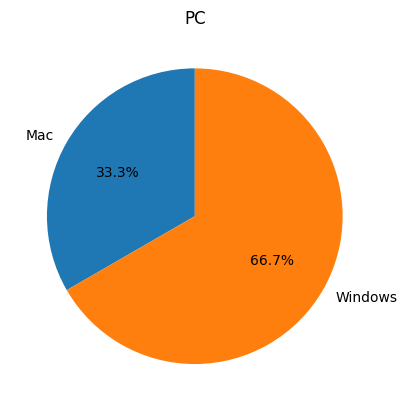

In [114]:
# 今使っているpcのアンケート結果
import matplotlib.pyplot as plt

# データベースに接続
con = sqlite3.connect('pc_data.db')
cur = con.cursor()

# データベースからデータを取得
cur.execute("SELECT pc, COUNT(*) FROM pc GROUP BY pc;")
data = cur.fetchall()

# データの処理
labels, counts = zip(*data)

# グラフの描画
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('PC')
plt.show()

# DBへの接続を閉じる
con.close()


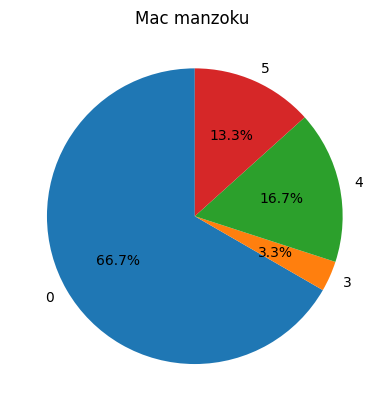

In [120]:
# Macの満足度(欠損値除去前)
import matplotlib.pyplot as plt

# データベースに接続
con = sqlite3.connect('pc_data.db')
cur = con.cursor()

# データベースからデータを取得
cur.execute("SELECT \"Mac manzoku\", COUNT(*) FROM pc GROUP BY \"Mac manzoku\";")
data = cur.fetchall()

# データの処理
labels, counts = zip(*data)

# グラフの描画
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Mac manzoku ')
plt.show()

# DBへの接続を閉じる
con.close()



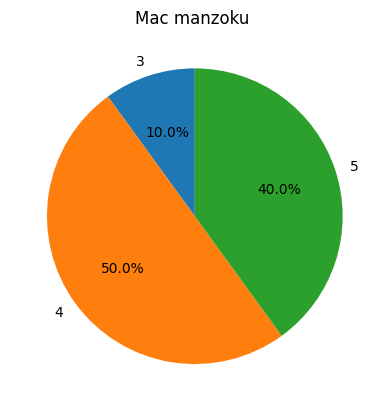

In [127]:
# Macの満足度(欠損値除去後)
import matplotlib.pyplot as plt

# データベースに接続
con = sqlite3.connect('pc_data.db')
cur = con.cursor()

# データベースからデータを取得 (0以外の値を取得)
cur.execute("SELECT \"Mac manzoku\", COUNT(*) FROM pc WHERE \"Mac manzoku\" != 0 GROUP BY \"Mac manzoku\";")
data = cur.fetchall()

# データの処理
labels, counts = zip(*data)

# グラフの描画
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Mac manzoku ')
plt.show()

# DBへの接続を閉じる
con.close()


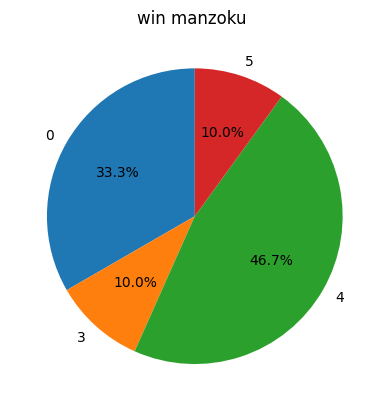

In [129]:
# windowsの満足度(欠損地除去前)
import matplotlib.pyplot as plt

# データベースに接続
con = sqlite3.connect('pc_data.db')
cur = con.cursor()

# データベースからデータを取得
cur.execute("SELECT \"win manzoku\", COUNT(*) FROM pc GROUP BY \"win manzoku\";")
data = cur.fetchall()

# データの処理
labels, counts = zip(*data)

# グラフの描画
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('win manzoku ')
plt.show()

# DBへの接続を閉じる
con.close()


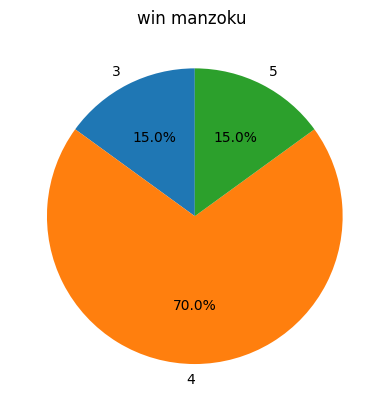

In [130]:
# windowsの満足度(欠損地除去後)
import matplotlib.pyplot as plt

# データベースに接続
con = sqlite3.connect('pc_data.db')
cur = con.cursor()

# データベースからデータを取得 (0以外の値を取得)
cur.execute("SELECT \"win manzoku\", COUNT(*) FROM pc WHERE \"win manzoku\" != 0 GROUP BY \"win manzoku\";")
data = cur.fetchall()

# データの処理
labels, counts = zip(*data)

# グラフの描画
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('win manzoku ')
plt.show()

# DBへの接続を閉じる
con.close()
